In [3]:
from requests_html import HTMLSession
import pandas as pd	

In [4]:
url = 'https://finance.yahoo.com/quote/AAPL/history?p=AAPL&guccounter=1&period1=1556113078&period2=1713965616'
session = HTMLSession()
r = session.get(url)

In [5]:
rows = r.html.xpath('//table/tbody/tr')
symbol = 'AAPL'
data = []
for row in rows:
    if len(row.xpath('.//td')) < 7:
        continue
    data.append({
        'Symbol':symbol,
        'Date':row.xpath('.//td[1]/text()')[0],
        'Open':row.xpath('.//td[2]/text()')[0],
        'High':row.xpath('.//td[3]/text()')[0],
        'Low':row.xpath('.//td[4]/text()')[0],
        'Close':row.xpath('.//td[5]/text()')[0],
        'Adj Close':row.xpath('.//td[6]/text()')[0],
        'Volume':row.xpath('.//td[7]/text()')[0]
    }) 
df = pd.DataFrame(data)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Symbol     1260 non-null   object
 1   Date       1260 non-null   object
 2   Open       1260 non-null   object
 3   High       1260 non-null   object
 4   Low        1260 non-null   object
 5   Close      1260 non-null   object
 6   Adj Close  1260 non-null   object
 7   Volume     1260 non-null   object
dtypes: object(8)
memory usage: 78.9+ KB


In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
str_cols = ['High', 'Low', 'Close', 'Adj Close', 'Volume']
df[str_cols]=df[str_cols].replace(',', '', regex=True).astype(float)

In [9]:
df.dropna(inplace=True)

In [10]:
df = df.set_index('Date')
df.head()

,Symbol,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2024-04-24,AAPL,166.54,169.30,166.21,169.02,168.79,48251800.0
2024-04-23,AAPL,165.35,167.05,164.92,166.90,166.67,49537800.0
2024-04-22,AAPL,165.52,167.26,164.77,165.84,165.62,48116400.0
2024-04-19,AAPL,166.21,166.40,164.08,165.00,164.78,67772100.0
2024-04-18,AAPL,168.03,168.64,166.55,167.04,166.81,43122900.0


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
plt.style.use('ggplot')

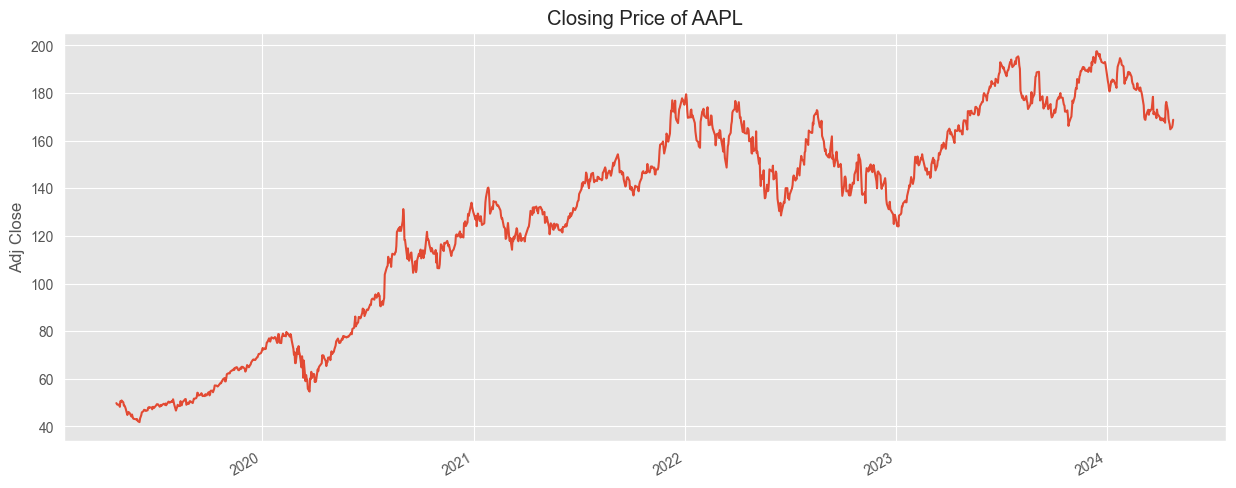

In [12]:
plt.figure(figsize=(15, 6))
df['Adj Close'].plot()
plt.ylabel('Adj Close')
plt.xlabel(None)
plt.title('Closing Price of AAPL')
plt.show()

In [13]:
features = ['Open', 'High', 'Low', 'Volume']
y = df.filter(['Adj Close'])

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(df[features])

In [15]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=10) 
for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [16]:
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [17]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [18]:
model = Sequential()
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [19]:
model.fit(X_train, y_train, epochs=100, batch_size=8)

Epoch 1/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 20431.2598
Epoch 2/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19713.7793
Epoch 3/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17779.7383
Epoch 4/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14245.2314
Epoch 5/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10253.4805
Epoch 6/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6732.9492
Epoch 7/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4016.5535
Epoch 8/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2094.1426
Epoch 9/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 986.8148 
Epoch 10/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 391.8292
Epoch 11/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 176.0243
Epoch 12/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 77.9383
Epoch 13/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 52.2554
Epoch 14/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 42.1989
Epoc

In [20]:
y_pred= model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


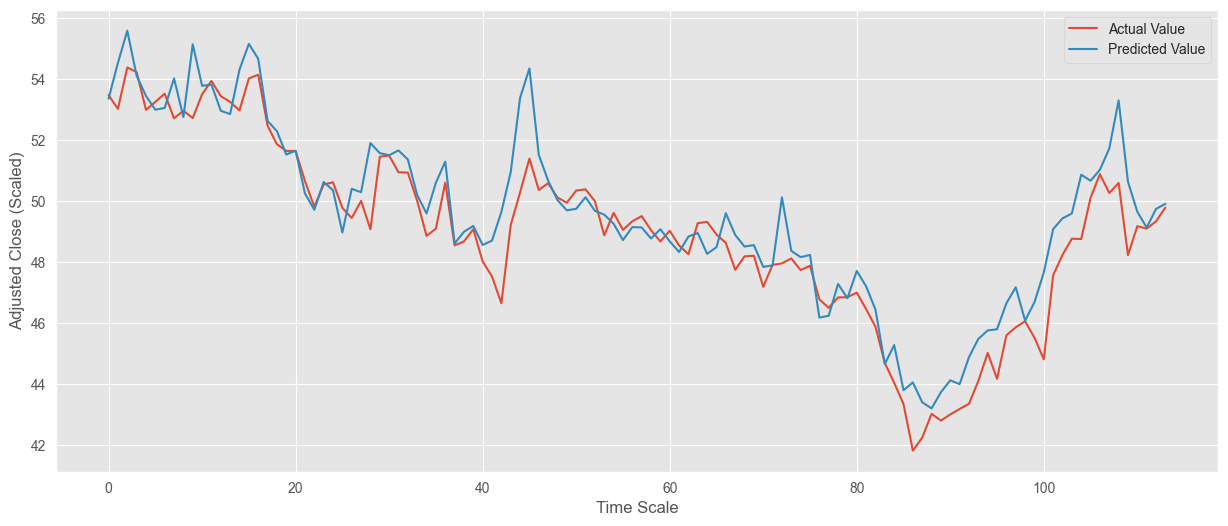

In [21]:
plt.figure(figsize=(15, 6))
plt.plot(y_test.values, label='Actual Value')
plt.plot(y_pred, label='Predicted Value')
plt.ylabel('Adjusted Close (Scaled)')
plt.xlabel('Time Scale')
plt.legend()